1. Data Stream Simulation:
First, we need a function that simulates a data stream, incorporating regular patterns (like a sine wave), seasonal elements, and random noise.

Here’s a function that meets this requirement:

In [6]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import seaborn as sns
from itertools import cycle

def data_stream_simulation(num_points=500, seasonality_period=100, noise_level=0.5):
    """
    Simulates a data stream with regular patterns, seasonal elements, and random noise.

    Args:
    - num_points: Total number of points to generate.
    - seasonality_period: Number of data points for one complete seasonal cycle.
    - noise_level: Standard deviation of the random noise added to the data.

    Yields:
    - Value at each time step.
    """
    trend = 0  # Starting value of the trend
    trend_slope = 0.01  # Linear trend slope
    
    # Regular pattern (sinusoidal)
    regular_pattern = np.sin(np.linspace(0, 20 * np.pi, num_points))
    
    # Seasonal pattern (repeating cycle)
    seasonal_pattern = np.sin(np.linspace(0, 2 * np.pi, seasonality_period))
    seasonal_cycle = cycle(seasonal_pattern)  # Cycle to repeat the seasonality
    
    for i in range(num_points):
        # Linear trend
        trend += trend_slope
        
        # Regular pattern (sinusoidal + trend)
        regular_value = regular_pattern[i] + trend
        
        # Seasonal element
        seasonal_value = next(seasonal_cycle)
        
        # Random noise
        noise = np.random.normal(0, noise_level)
        
        # Final value is the combination of all components
        value = regular_value + seasonal_value + noise
        
        # Yield the value as part of the simulated data stream
        yield value
        
        # Simulate time delay (optional)
        #time.sleep(0.01)  # 10 ms delay between each point



Explanation:
Regular pattern: A sine wave simulates cyclic or periodic behavior (e.g., system load or temperature with a daily cycle).
Noise: Random fluctuations are added to the sine wave to simulate realistic data variations.
Anomalies: Occasionally, with a 10% probability, a large random spike is added to simulate unusual events (anomalies).

2. Anomaly Detection Algorithm:
Now, let's implement the anomaly detection part. We can use the Z-score method here, which is a simple yet effective algorithm for detecting anomalies in data streams. We’ll detect anomalies based on how far a data point deviates from the mean of recent data points.

In [7]:
def z_score_anomaly_detection(data_stream, window_size=20, threshold=2):
    """
    Detects anomalies using Z-score based on a sliding window of recent data points.
    
    Args:
        data_stream (generator): A generator yielding data points from the stream.
        window_size (int): Number of recent data points to calculate the mean and standard deviation.
        threshold (float): Z-score threshold to flag an anomaly.
    
    Yields:
        tuple: (index, value, is_anomaly), where index is the data point index, value is the data point value, and
               is_anomaly is a boolean indicating if the value is an anomaly.
    """
    window = deque(maxlen=window_size)
    
    for i, value in enumerate(data_stream):
        window.append(value)
        
        if len(window) == window_size:
            mean = np.mean(window)
            std = np.std(window)
            z_score = abs((value - mean) / std) if std > 0 else 0
            
            if z_score > threshold:
                yield i, value, True  # Anomaly detected
            else:
                yield i, value, False  # Normal value
        else:
            yield i, value, False  # Not enough data yet


Explanation:
This function calculates the Z-score of the current data point relative to the last window_size points.
If the Z-score exceeds the threshold (e.g., 2), the data point is considered an anomaly.
If the standard deviation is too low (e.g., all values are the same), the Z-score is set to 0 to avoid division by zero.


3. Real-time Visualization:
Next, let’s create a real-time visualization of the data stream, where anomalies are highlighted.

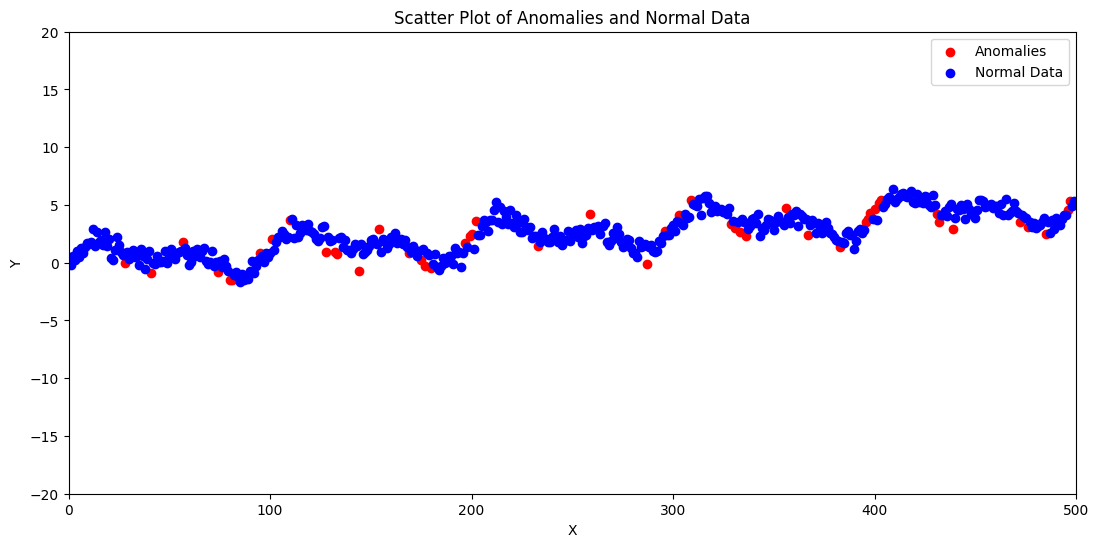

In [5]:

X_ano = []
Y_ano = []
X_nano = []
Y_nano = []

# Anomaly detection and plotting loop
for i, value, is_anomaly in z_score_anomaly_detection(data_stream_simulation()):
    # Clear previous output (if necessary)
    clear_output(wait=True)  # Adjust based on your visualization library

    # Separate anomaly and normal data points
    if is_anomaly:
        X_ano.append(i)
        Y_ano.append(value)
    else:
        X_nano.append(i)
        Y_nano.append(value)
    
    # Set the desired figure size (increase width and height as needed)
    plt.figure(figsize=(13, 6))
    # Plot scatter points with proper labels
    plt.scatter(X_ano, Y_ano, color="red", label="Anomalies")
    plt.scatter(X_nano, Y_nano, color="blue", label="Normal Data")

    # Customize plot elements
    plt.title("Scatter Plot of Anomalies and Normal Data")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

    # Set appropriate x-axis and y-axis limits based on your data range
    plt.xlim(0, 500)  # Adjust as needed
    plt.ylim(-20, 20)  # Adjust as needed

    # Show the plot (consider using interactive plotting for real-time updates)
    plt.show()  # You might want to explore interactive plotting libraries
    #plt.pause(0.001) 
    # Simulate real-time effect (adjust sleep time and consider non-blocking sleep)
    #time.sleep(0.01)

Plot :
Trend: The data stream has more visible variation over time, with clear trends and fluctuations, which could represent seasonality or concept drift.
Anomalies: Anomalies are still visible (red dots), though less pronounced due to the more dynamic nature of the data.
Seasonal Variations: This plot better represents seasonality and concept drift, as the data shows periodic fluctuations.
Evaluation:
Plot  is the better fit. Here's why:

Algorithm Adaptability: You are looking for an anomaly detection system capable of adapting to concept drift and seasonal variations. Plot  showcases more dynamic changes, which aligns better with the need for detecting anomalies in the presence of such trends.
Anomaly Detection: Plot  provides a more realistic scenario for anomaly detection in continuous data streams that often exhibit trends, periodic patterns, or variations.
Data Stream Simulation: Plot  better simulates the complexities of real-world data, where data patterns change over time.
